# Image Classification on Fashion MNIST Dataset
This project is one of my Deep Learning projects. For this project, we have the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 pixels grayscale image, associated with a label from 10 classes. Here's an example how the data looks,

![Fashion-MNIST samples (by Zalando, MIT License)](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png)

The goal of this project is to create a neural network model to classify clothing images by predicting their labels.


In [1]:
# Import the libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the Data
We can import and load the Fashion MNIST dataset directly from TensorFlow. Loading the dataset returns four NumPy arrays:

- The train_images and train_labels arrays are the training set, which is the data the model uses to learn.
- The model is tested against the test set, the test_images, and test_labels arrays.


In [2]:
# Load the data
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. The labels and the corresponding class of clothing is shown in the table below:

| Label | Class       |
|-------|-------------|
| 0     | T-shirt/top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle boot  |

Each image is mapped to a single label. Since the class names are not included with the dataset, we will create a list to store these class names.

In [3]:
# Create list for the class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Preprocessing the Data
Before training the network, we need to preprocess the data. Let's first inspect the first image in the training set.

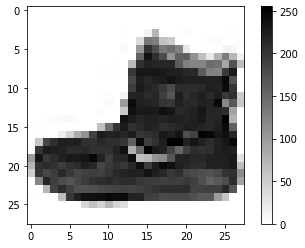

In [4]:
# Plot the first image in the training set
plt.imshow(train_images[0], cmap='binary')
plt.colorbar()
plt.show()

As we can see, pixel values fall in the range of 0 to 255. However, we need to scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, we can divide the values by 255. 

In [5]:
# Divide the values by 255
train_images = train_images / 255
test_images = test_images / 255

To verify that the data is in the correct format, let's display the first 25 images from the training set along with the class name below each image.

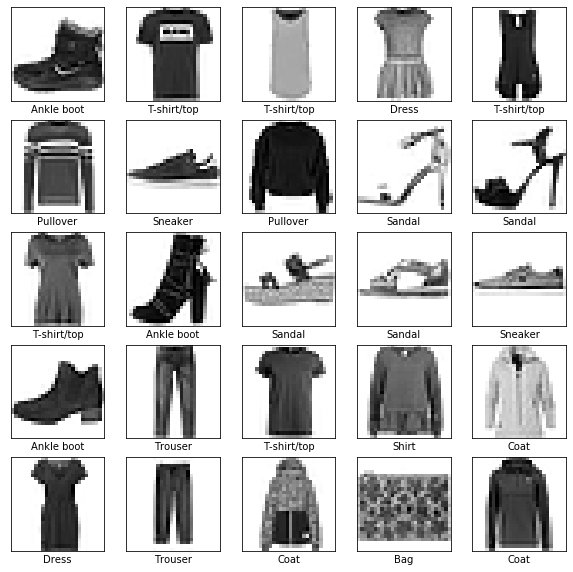

In [6]:
# Plot the first 25 images in the training set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='binary')
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Building the Model
Now, we can building the neural network by configuring the layers of the model, then compiling the model.

### Setting Up the Layers
The first layer in this neural network, `keras.layers.Flatten`, which will transform the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels).

After the pixels are flattened, the network consists of a sequence of two `keras.layers.Dense` layers. The first Dense layer has 128 nodes (or neurons) and the second layer will return a softmax array with length of 10.

In [7]:
# Set up the layers
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(len(class_names), activation='softmax')

])

### Compiling the Model
Before training the model, we need to compile the model with the following settings:
- Loss function: This measures how accurate the model is during training. For the loss function, we are going to use the sparse categorical cross entropy.
- Optimizer: This is how the model is updated based on the data it sees and its loss function. We are going to use Adam, which is an optimization algorithm based on adaptive estimation of first-order and second-order moments.
- Metrics: Used to monitor the training and testing steps. Here we will use accuracy, the fraction of the images that are correctly classified.

In [8]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Fitting the Model
Now, we can use the `model.fit` method to fits the model to the training data.

In [9]:
# Fit the model
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 121us/sample - loss: 0.4933 - accuracy: 0.8254
Epoch 2/10
60000/60000 [==============================] - 6s 102us/sample - loss: 0.3717 - accuracy: 0.8647
Epoch 3/10
60000/60000 [==============================] - 6s 102us/sample - loss: 0.3337 - accuracy: 0.8776
Epoch 4/10
60000/60000 [==============================] - 6s 104us/sample - loss: 0.3117 - accuracy: 0.8861
Epoch 5/10
60000/60000 [==============================] - 6s 100us/sample - loss: 0.2944 - accuracy: 0.8914
Epoch 6/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.2801 - accuracy: 0.8963
Epoch 7/10
60000/60000 [==============================] - 6s 104us/sample - loss: 0.2666 - accuracy: 0.9009
Epoch 8/10
60000/60000 [==============================] - 6s 102us/sample - loss: 0.2562 - accuracy: 0.9052
Epoch 9/10
60000/60000 [==============================] - 6s 101us/sample - loss: 0.2487 - accuracy: 0.9074
Epoch 

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

## Evaluating the Model
Next, compare how the model performs on the test dataset.

In [10]:
# Get the model's accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

10000/1 - 1s - loss: 0.2127 - accuracy: 0.8781


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset.

## Making Predictions
With the model trained, we can now use it to make predictions on some images.

In [11]:
# Make predictions
predictions = model.predict(test_images)

Let's plot several images along with their predictions.

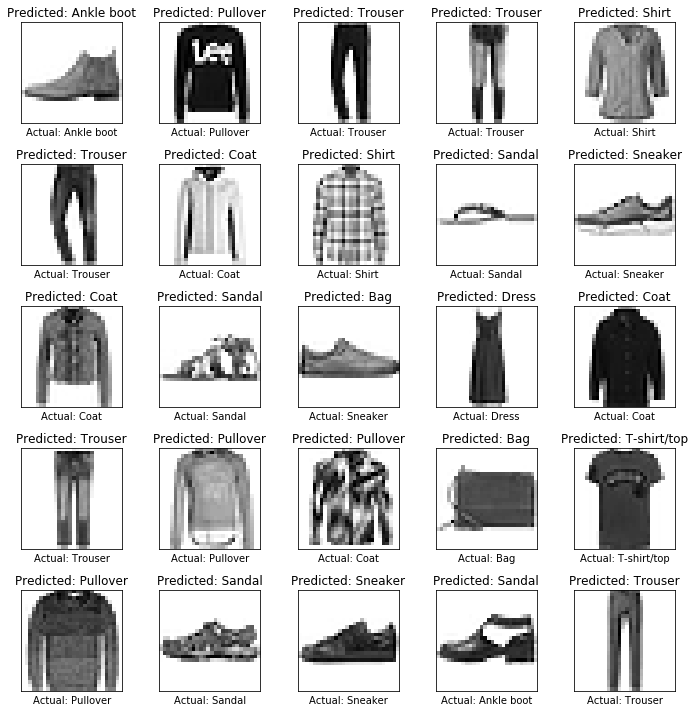

In [12]:
# Plot the images for the first 25 predictions
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.gca().set_title(f'Predicted: {class_names[np.argmax(predictions[i])]}')
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap='binary')
    plt.xlabel(f'Actual: {class_names[test_labels[i]]}')
    plt.tight_layout()
plt.show()